In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [68]:
data = pd.read_json("book_best_001_050.jl", lines=True)


# **Dataset**


In [69]:
data.head()

,url,title,titleComplete,description,imageUrl,genres,asin,isbn,isbn13,publisher,...,author,publishDate,characters,places,ratingHistogram,ratingsCount,reviewsCount,numPages,language,awards
0,https://www.goodreads.com/book/show/2767052-th...,The Hunger Games,"The Hunger Games (The Hunger Games, #1)","Could you survive on your own in the wild, wit...",https://images-na.ssl-images-amazon.com/images...,"[Romance, Adventure, Dystopia, Fantasy, Scienc...",0439023483,0439023483,9.780439e+12,Scholastic Press,...,[Suzanne Collins],1.223968e+12,"[Rue, Effie Trinket, Haymitch Abernathy, Caesa...","[Capitol, Panem, District 12, Panem, Panem]","[118499, 214967, 958016, 2516526, 4483011]",8291019.0,208945.0,374.0,English,"[{'name': 'Locus Award', 'awardedAt': 12307968..."
1,https://www.goodreads.com/book/show/136251.Har...,Harry Potter and the Deathly Hallows,Harry Potter and the Deathly Hallows (Harry Po...,"Harry has been burdened with a dark, dangerous...",https://images-na.ssl-images-amazon.com/images...,"[Classics, Adventure, Fantasy, Childrens, Scie...",NaN,NaN,NaN,Arthur A. Levine Books,...,[J.K. Rowling],1.185001e+12,"[Sirius Black, Ginny Weasley, Remus Lupin, Cho...","[London, England, Hogwarts School of Witchcraf...","[29882, 42756, 202691, 706484, 2610889]",3592702.0,82737.0,759.0,English,"[{'name': 'Locus Award', 'awardedAt': 11991744..."
2,https://www.goodreads.com/book/show/77203.The_...,The Kite Runner,The Kite Runner,1970s Afghanistan: Twelve-year-old Amir is des...,https://images-na.ssl-images-amazon.com/images...,"[Historical Fiction, Classics, Contemporary, H...",NaN,NaN,NaN,Riverhead Books,...,[Khaled Hosseini],1.083395e+12,"[Hassan (The Kite Runner), Amir (The Kite Runn...","[Pakistan, Kabul, Fremont, California, Afghani...","[46329, 82073, 318094, 952094, 1654764]",3053354.0,94878.0,371.0,English,"[{'name': 'Borders Original Voices Award', 'aw..."
3,https://www.goodreads.com/book/show/2956.The_A...,The Adventures of Huckleberry Finn,The Adventures of Huckleberry Finn,A nineteenth-century boy from a Mississippi Ri...,https://images-na.ssl-images-amazon.com/images...,"[Historical Fiction, Classics, Adventure, High...",0142437174,0142437174,9.780142e+12,Penguin Classics,...,"[William Little Hughes, Mark Twain, John Seely...",1.041322e+12,"[Huckleberry Finn, Mark Twain, Tom Sawyer, Jim...","[Mississippi River, Hannibal, Missouri, St. Pe...","[34415, 92189, 312519, 431863, 382344]",1253330.0,19140.0,327.0,English,NaN
4,https://www.goodreads.com/book/show/35031085-f...,Frankenstein: The 1818 Text,Frankenstein: The 1818 Text,This is a previously-published edition of ISBN...,https://images-na.ssl-images-amazon.com/images...,"[Classics, Read For School, Science Fiction, F...",NaN,NaN,NaN,Penguin Classics,...,"[Mary Wollstonecraft Shelley, Charlotte Gordon]",1.520496e+12,"[Victor Frankenstein, Caroline Beaufort Franke...","[Arctic Circle, Germany, Switzerland, Ingolsta...","[42413, 108879, 363544, 535250, 493555]",1543641.0,58598.0,260.0,English,NaN


In [70]:
# Check column names
data.columns

Index(['url', 'title', 'titleComplete', 'description', 'imageUrl', 'genres',
       'asin', 'isbn', 'isbn13', 'publisher', 'series', 'author',
       'publishDate', 'characters', 'places', 'ratingHistogram',
       'ratingsCount', 'reviewsCount', 'numPages', 'language', 'awards'],
      dtype='object')

In [71]:
# keep the data that we need
data = data.drop(columns=['url','awards','titleComplete','imageUrl','isbn','places','ratingHistogram','asin','publishDate','isbn13'])
# find number of sample and feature
display(data.shape)

(10600, 11)

In [72]:
# check data type of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         10583 non-null  object 
 1   description   10567 non-null  object 
 2   genres        10405 non-null  object 
 3   publisher     10219 non-null  object 
 4   series        5487 non-null   object 
 5   author        10583 non-null  object 
 6   characters    6078 non-null   object 
 7   ratingsCount  10566 non-null  float64
 8   reviewsCount  10546 non-null  float64
 9   numPages      10461 non-null  float64
 10  language      10476 non-null  object 
dtypes: float64(3), object(8)
memory usage: 911.1+ KB


# Data Cleaning


In [73]:
# find number of NaN in each column
data.isna().sum()

title             17
description       33
genres           195
publisher        381
series          5113
author            17
characters      4522
ratingsCount      34
reviewsCount      54
numPages         139
language         124
dtype: int64

In [74]:
data.language.unique()

array(['English', 'Persian', 'Arabic', 'French', 'Spanish; Castilian',
       'German', nan, 'Scots', 'Bulgarian', 'Polish', 'Portuguese',
       'Turkish', 'Indonesian', 'Multiple languages', 'Italian',
       'Norwegian', 'Romanian', 'Japanese', 'Chinese', 'Tamil',
       'Dutch; Flemish', 'Undetermined', 'French, Middle (ca.1400-1600)',
       'Urdu', 'Bokmål, Norwegian; Norwegian Bokmål', 'Marathi',
       'Swedish', 'Croatian', 'Malayalam', 'Korean', 'Finnish', 'Russian',
       'Greek, Modern (1453-)', 'Icelandic', 'Vietnamese'], dtype=object)

## Replace missing publisher with unknown


In [75]:
data[['publisher']] = data[['publisher']].fillna("unknown")
data.isna().sum()

title             17
description       33
genres           195
publisher          0
series          5113
author            17
characters      4522
ratingsCount      34
reviewsCount      54
numPages         139
language         124
dtype: int64

## Remove row with missing title

In [76]:
data.dropna(subset=['title'], inplace=True)
data.isna().sum()

title              0
description       16
genres           178
publisher          0
series          5096
author             0
characters      4505
ratingsCount      17
reviewsCount      37
numPages         122
language         107
dtype: int64

## Replace other missing value with " "

In [77]:
data[['description']] = data[['description']].fillna(" ")
data[['genres']] = data[['genres']].fillna(" ")
data[['series']] = data[['series']].fillna(" ")
data[['characters']] = data[['characters']].fillna(" ")
data[['language']] = data[['language']].fillna(" ")
data[['ratingsCount']] = data[['ratingsCount']].fillna("0")
data[['reviewsCount']] = data[['reviewsCount']].fillna("0")
data[['numPages']] = data[['numPages']].fillna("0")

data.isna().sum()

title           0
description     0
genres          0
publisher       0
series          0
author          0
characters      0
ratingsCount    0
reviewsCount    0
numPages        0
language        0
dtype: int64

## Remove punctuations

In [78]:
import string
punctuations = string.punctuation
def remove_punctuations(text):
    return text.translate(str.maketrans('', '', punctuations))


In [79]:
# array to string
data['author'] = data['author'].astype(str)
data['characters'] = data['characters'].astype(str)
data['genres'] = data['genres'].astype(str)
data['series'] = data['series'].astype(str)


In [80]:
data.description = data.description.apply(remove_punctuations)
data.genres = data.genres.apply(remove_punctuations)
data.series = data.series.apply(remove_punctuations)
data.characters = data.characters.apply(remove_punctuations)
data.author = data.author.apply(remove_punctuations)

data.head()

,title,description,genres,publisher,series,author,characters,ratingsCount,reviewsCount,numPages,language
0,The Hunger Games,Could you survive on your own in the wild with...,Romance Adventure Dystopia Fantasy Science Fic...,Scholastic Press,The Hunger Games,Suzanne Collins,Rue Effie Trinket Haymitch Abernathy Caesar Fl...,8291019.0,208945.0,374.0,English
1,Harry Potter and the Deathly Hallows,Harry has been burdened with a dark dangerous ...,Classics Adventure Fantasy Childrens Science F...,Arthur A. Levine Books,Harry Potter,JK Rowling,Sirius Black Ginny Weasley Remus Lupin Cho Cha...,3592702.0,82737.0,759.0,English
2,The Kite Runner,1970s Afghanistan Twelveyearold Amir is desper...,Historical Fiction Classics Contemporary Histo...,Riverhead Books,,Khaled Hosseini,Hassan The Kite Runner Amir The Kite Runner Fa...,3053354.0,94878.0,371.0,English
3,The Adventures of Huckleberry Finn,A nineteenthcentury boy from a Mississippi Riv...,Historical Fiction Classics Adventure High Sch...,Penguin Classics,Adventures of Tom and Huck,William Little Hughes Mark Twain John Seelye G...,Huckleberry Finn Mark Twain Tom Sawyer Jim Upton,1253330.0,19140.0,327.0,English
4,Frankenstein: The 1818 Text,This is a previouslypublished edition of ISBN ...,Classics Read For School Science Fiction Fanta...,Penguin Classics,,Mary Wollstonecraft Shelley Charlotte Gordon,Victor Frankenstein Caroline Beaufort Frankens...,1543641.0,58598.0,260.0,English


## Remove extra spaces from the text columns and convert the lettercase to lower

In [81]:
data[["title", "author", "publisher", "description","series","genres","characters"]] = pd.concat([data[col].astype(str).str.lower().str.strip() for col in ["title", "author", "publisher", "description","series","genres","characters"]], axis=1)
data.head()

,title,description,genres,publisher,series,author,characters,ratingsCount,reviewsCount,numPages,language
0,the hunger games,could you survive on your own in the wild with...,romance adventure dystopia fantasy science fic...,scholastic press,the hunger games,suzanne collins,rue effie trinket haymitch abernathy caesar fl...,8291019.0,208945.0,374.0,English
1,harry potter and the deathly hallows,harry has been burdened with a dark dangerous ...,classics adventure fantasy childrens science f...,arthur a. levine books,harry potter,jk rowling,sirius black ginny weasley remus lupin cho cha...,3592702.0,82737.0,759.0,English
2,the kite runner,1970s afghanistan twelveyearold amir is desper...,historical fiction classics contemporary histo...,riverhead books,,khaled hosseini,hassan the kite runner amir the kite runner fa...,3053354.0,94878.0,371.0,English
3,the adventures of huckleberry finn,a nineteenthcentury boy from a mississippi riv...,historical fiction classics adventure high sch...,penguin classics,adventures of tom and huck,william little hughes mark twain john seelye g...,huckleberry finn mark twain tom sawyer jim upton,1253330.0,19140.0,327.0,English
4,frankenstein: the 1818 text,this is a previouslypublished edition of isbn ...,classics read for school science fiction fanta...,penguin classics,,mary wollstonecraft shelley charlotte gordon,victor frankenstein caroline beaufort frankens...,1543641.0,58598.0,260.0,English


## Transform title, genres, characters and author names into single token

In [82]:

data["author2"] = data["author"].str.strip().str.replace(' ','_')
data["title2"] = data["title"].str.strip().str.replace(' ','_')
data["publisher2"] = data["publisher"].str.strip().str.replace(' ','_')
data["genres2"] = data["genres"].str.strip().str.replace(' ','_')
data["characters2"] = data["characters"].str.strip().str.replace(' ','_')
data["series2"] = data["series"].str.strip().str.replace(' ','_')

data.head()

,title,description,genres,publisher,series,author,characters,ratingsCount,reviewsCount,numPages,language,author2,title2,publisher2,genres2,characters2,series2
0,the hunger games,could you survive on your own in the wild with...,romance adventure dystopia fantasy science fic...,scholastic press,the hunger games,suzanne collins,rue effie trinket haymitch abernathy caesar fl...,8291019.0,208945.0,374.0,English,suzanne_collins,the_hunger_games,scholastic_press,romance_adventure_dystopia_fantasy_science_fic...,rue_effie_trinket_haymitch_abernathy_caesar_fl...,the_hunger_games
1,harry potter and the deathly hallows,harry has been burdened with a dark dangerous ...,classics adventure fantasy childrens science f...,arthur a. levine books,harry potter,jk rowling,sirius black ginny weasley remus lupin cho cha...,3592702.0,82737.0,759.0,English,jk_rowling,harry_potter_and_the_deathly_hallows,arthur_a._levine_books,classics_adventure_fantasy_childrens_science_f...,sirius_black_ginny_weasley_remus_lupin_cho_cha...,harry_potter
2,the kite runner,1970s afghanistan twelveyearold amir is desper...,historical fiction classics contemporary histo...,riverhead books,,khaled hosseini,hassan the kite runner amir the kite runner fa...,3053354.0,94878.0,371.0,English,khaled_hosseini,the_kite_runner,riverhead_books,historical_fiction_classics_contemporary_histo...,hassan_the_kite_runner_amir_the_kite_runner_fa...,
3,the adventures of huckleberry finn,a nineteenthcentury boy from a mississippi riv...,historical fiction classics adventure high sch...,penguin classics,adventures of tom and huck,william little hughes mark twain john seelye g...,huckleberry finn mark twain tom sawyer jim upton,1253330.0,19140.0,327.0,English,william_little_hughes_mark_twain_john_seelye_g...,the_adventures_of_huckleberry_finn,penguin_classics,historical_fiction_classics_adventure_high_sch...,huckleberry_finn_mark_twain_tom_sawyer_jim_upton,adventures_of_tom_and_huck
4,frankenstein: the 1818 text,this is a previouslypublished edition of isbn ...,classics read for school science fiction fanta...,penguin classics,,mary wollstonecraft shelley charlotte gordon,victor frankenstein caroline beaufort frankens...,1543641.0,58598.0,260.0,English,mary_wollstonecraft_shelley_charlotte_gordon,frankenstein:_the_1818_text,penguin_classics,classics_read_for_school_science_fiction_fanta...,victor_frankenstein_caroline_beaufort_frankens...,


## Merge all textual information to create summary

In [83]:
data["merge"] = data[["title2", 'author2', 'publisher2', 'language','series2','characters2','genres2']].fillna('').agg(' '.join, axis=1)
data.head()

,title,description,genres,publisher,series,author,characters,ratingsCount,reviewsCount,numPages,language,author2,title2,publisher2,genres2,characters2,series2,merge
0,the hunger games,could you survive on your own in the wild with...,romance adventure dystopia fantasy science fic...,scholastic press,the hunger games,suzanne collins,rue effie trinket haymitch abernathy caesar fl...,8291019.0,208945.0,374.0,English,suzanne_collins,the_hunger_games,scholastic_press,romance_adventure_dystopia_fantasy_science_fic...,rue_effie_trinket_haymitch_abernathy_caesar_fl...,the_hunger_games,the_hunger_games suzanne_collins scholastic_pr...
1,harry potter and the deathly hallows,harry has been burdened with a dark dangerous ...,classics adventure fantasy childrens science f...,arthur a. levine books,harry potter,jk rowling,sirius black ginny weasley remus lupin cho cha...,3592702.0,82737.0,759.0,English,jk_rowling,harry_potter_and_the_deathly_hallows,arthur_a._levine_books,classics_adventure_fantasy_childrens_science_f...,sirius_black_ginny_weasley_remus_lupin_cho_cha...,harry_potter,harry_potter_and_the_deathly_hallows jk_rowlin...
2,the kite runner,1970s afghanistan twelveyearold amir is desper...,historical fiction classics contemporary histo...,riverhead books,,khaled hosseini,hassan the kite runner amir the kite runner fa...,3053354.0,94878.0,371.0,English,khaled_hosseini,the_kite_runner,riverhead_books,historical_fiction_classics_contemporary_histo...,hassan_the_kite_runner_amir_the_kite_runner_fa...,,the_kite_runner khaled_hosseini riverhead_book...
3,the adventures of huckleberry finn,a nineteenthcentury boy from a mississippi riv...,historical fiction classics adventure high sch...,penguin classics,adventures of tom and huck,william little hughes mark twain john seelye g...,huckleberry finn mark twain tom sawyer jim upton,1253330.0,19140.0,327.0,English,william_little_hughes_mark_twain_john_seelye_g...,the_adventures_of_huckleberry_finn,penguin_classics,historical_fiction_classics_adventure_high_sch...,huckleberry_finn_mark_twain_tom_sawyer_jim_upton,adventures_of_tom_and_huck,the_adventures_of_huckleberry_finn william_lit...
4,frankenstein: the 1818 text,this is a previouslypublished edition of isbn ...,classics read for school science fiction fanta...,penguin classics,,mary wollstonecraft shelley charlotte gordon,victor frankenstein caroline beaufort frankens...,1543641.0,58598.0,260.0,English,mary_wollstonecraft_shelley_charlotte_gordon,frankenstein:_the_1818_text,penguin_classics,classics_read_for_school_science_fiction_fanta...,victor_frankenstein_caroline_beaufort_frankens...,,frankenstein:_the_1818_text mary_wollstonecraf...


# Save Data


In [84]:
data = data.drop(columns=["title2", 'author2', 'publisher2', 'series2','characters2','genres2'])
data.to_csv("preprocessed.csv", sep=",", index=False)

In [85]:
# Find duplicated values
data.shape[0] - data.nunique()

title             952
description       672
genres           1744
publisher        8101
series           7815
author           5060
characters       4910
ratingsCount      803
reviewsCount     4274
numPages         9560
language        10548
merge              43
dtype: int64

In [86]:
data[data.duplicated(subset=["title"], keep="first")]
data = data.drop_duplicates(subset=["title"], keep='first')


In [87]:
!pip install keybert

In [88]:
from keybert import KeyBERT
kw_model = KeyBERT()

def get_keywords(text):
    keywords = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words="english")
    keywords = " ".join([k[0] for k in keywords])
    return keywords


In [89]:
data["keywords"] = data.description.apply(get_keywords)
data.keywords.head()

0           katniss survival hunger survive death
1       harry potter horcruxes rowling voldemorts
2    afghanistan taliban amir kitefighting hassan
3             sawyers tom river slave mississippi
4             shelley shelleys 1818 novel monster
Name: keywords, dtype: object

In [90]:
data["keywords"] = data[['merge', 'keywords']].fillna('').agg(' '.join, axis=1)
data.drop(['merge', 'description'], axis = 1, inplace=True)

In [91]:
data.to_csv("keywords.csv", sep=",", index=False)

# Top 10 Authors with the most books

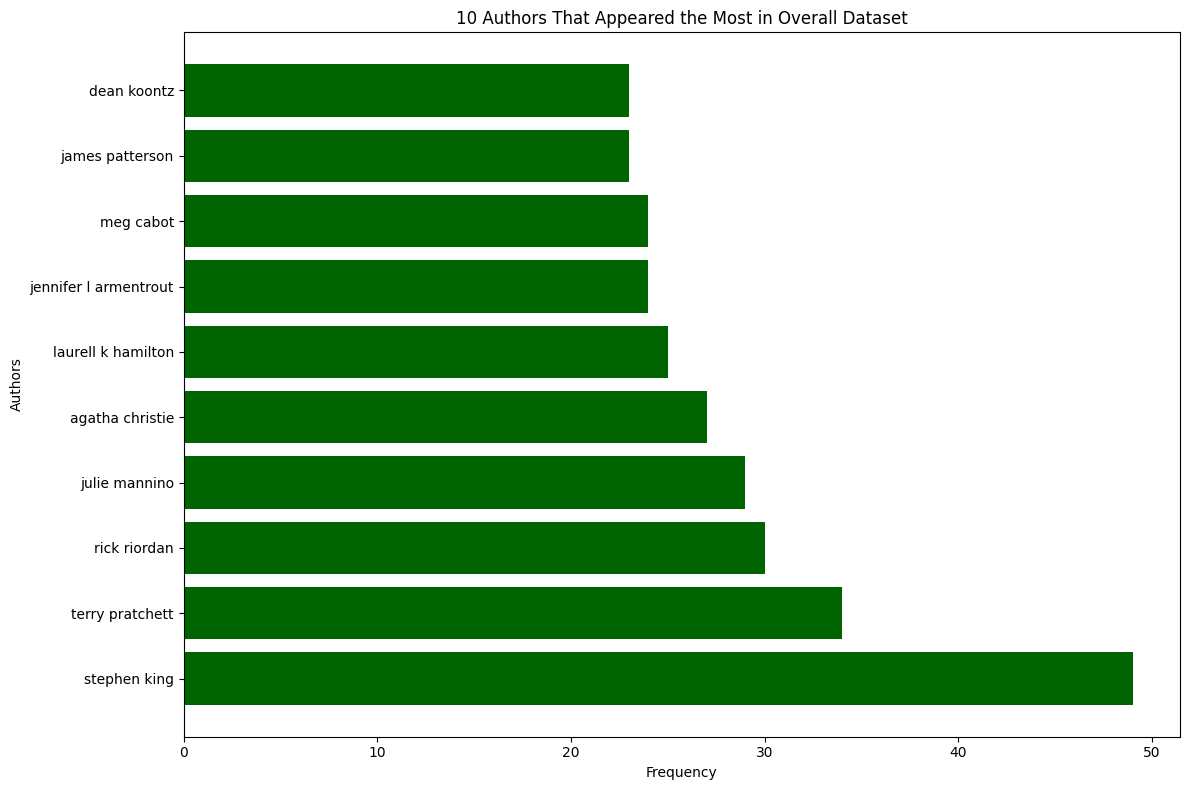

In [92]:
top_authors = data['author'].value_counts().head(10)
fig = plt.figure(figsize=(7, 5))
# print(top_authors.values)
plt.barh(tuple(top_authors.index), top_authors.values, color = 'darkgreen')
plt.title('10 Authors That Appeared the Most in Overall Dataset')
plt.xlabel('Frequency')
plt.ylabel('Authors');

plt.tight_layout()
plt.savefig('./top_authors.png')

# Top 10 Books have the highest review

In [93]:
import numpy as np
data['reviewsCount'] = data['reviewsCount'].astype(np.int64)

0    208945
1     82737
2     94878
3     19140
4     58598
5     18244
6     48151
7     45234
8    109599
9     38880
Name: reviewsCount, dtype: int64


4124    246701
362     245727
117     233118
2053    215320
0       208945
7760    197035
27      196796
485     176474
1737    168531
505     166701
Name: reviewsCount, dtype: int64


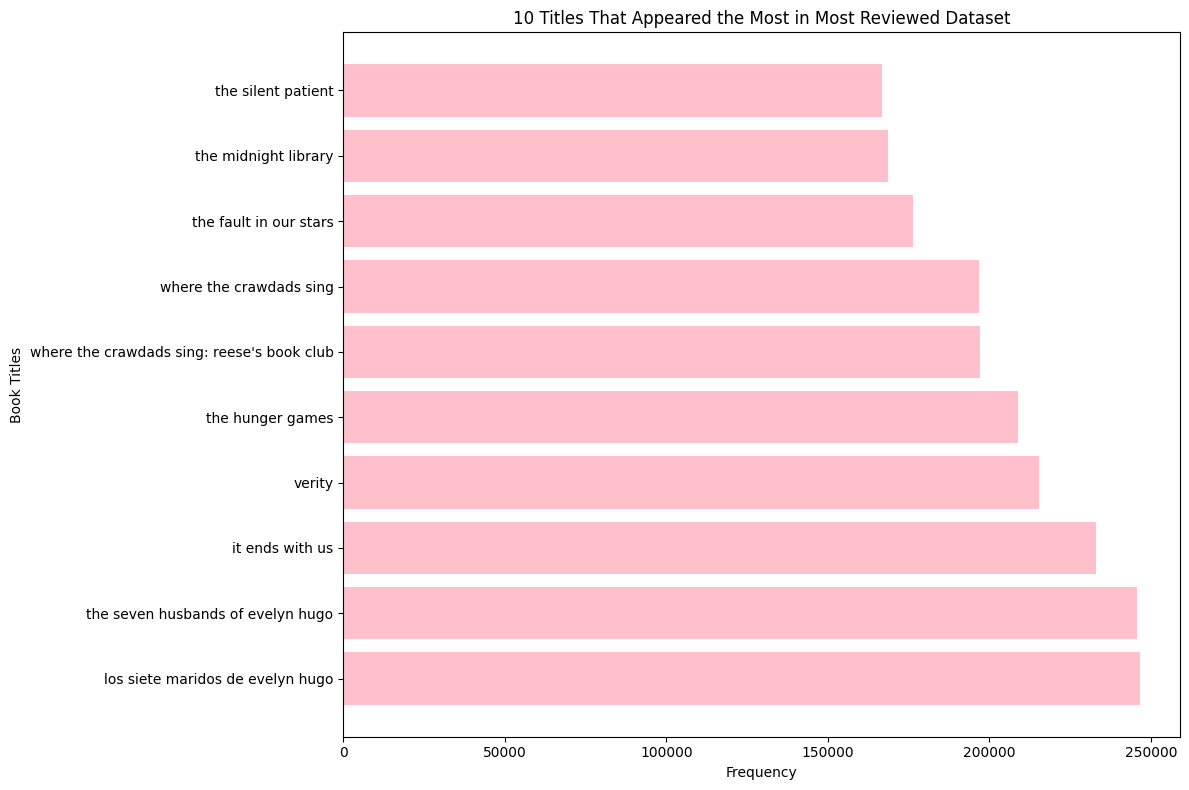

In [94]:
most_reviewed_books = data['reviewsCount'].nlargest(10)
print(most_reviewed_books)
book_title = data.loc[most_reviewed_books.index, 'title']

# print(most_reviewed_books.values)
fig = plt.figure(figsize=(7, 5))

plt.barh(book_title, most_reviewed_books.values, color = 'pink')
plt.title('10 Titles That Appeared the Most in Most Reviewed Dataset')
plt.xlabel('Frequency')
plt.ylabel('Book Titles');

plt.tight_layout()
plt.savefig('./top_books_rev.png')
# print(book_title)

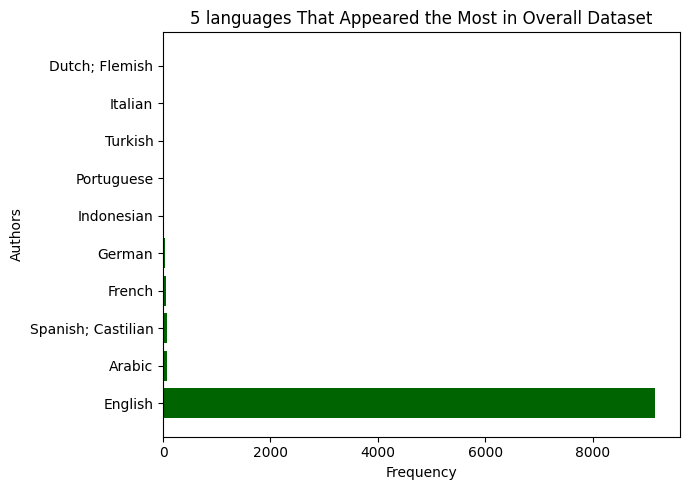

In [109]:
data2 = data.copy()
data2 = data2[data2['language'] != " "]
most_language_used = data2['language'].value_counts().head(10)
fig = plt.figure(figsize=(7, 5))
plt.barh(most_language_used.index, most_language_used.values, color = 'darkgreen')
plt.title('5 languages That Appeared the Most in Overall Dataset')
plt.xlabel('Frequency')
plt.ylabel('Authors');

plt.tight_layout()
plt.savefig('./most_language_used.png')

# Vectorize the keywords summary using TF-IDF


In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
model_data = data.copy()
tfidf = TfidfVectorizer(analyzer = 'word',
                        min_df=3,
                        max_df = 0.6,
                        stop_words="english",
                        encoding = 'utf-8',
                        token_pattern=r"(?u)\S\S+")
tfidf_encoding = tfidf.fit_transform(model_data["keywords"])

In [97]:
# Preview first 100 words in the vocabulary
print(tfidf.get_feature_names_out()[1:100])

['10' '100' '1000' '10000' '100000' '100th' '10th' '11' '114' '11th'
 '11yearold' '12' '120' '1200' '125' '12th' '12yearold' '13' '130' '1300'
 '13th' '13yearold' '14' '14th' '14yearold' '15' '150' '1500' '15th'
 '15yearold' '16' '160' '16th' '16thcentury' '16yearold' '17' '1700'
 '1776' '1778' '1787' '1789' '1793' '17th' '17thcentury' '17yearold' '18'
 '1800' '1800whereryou' '1807' '1810' '1814' '1818' '1828' '1831' '1833'
 '1835' '1836' '1840' '1841' '1842' '1844' '1845' '1848' '1849' '1850'
 '1850s' '1854' '1856' '1857' '1859' '1860' '1861' '1862' '1865' '1866'
 '1867' '1869' '1870' '1870s' '1871' '1875' '1879' '1880' '1880s' '1881'
 '1883' '1885' '1888' '1889' '1890' '1892' '1893' '1894' '1895' '1896'
 '1897' '1898' '1899' '18th']


In [98]:
# Lets find representation of a new book's keywords in the existing vocabulary space
tfidf.transform(["looking for alaska by john green"]).toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [99]:
tfidf = TfidfVectorizer(stop_words="english")
data['keywords'] = data['keywords'].fillna("")
tfidf_matrix = tfidf.fit_transform(data['keywords'])

In [100]:
# prompt: write code to drp[ duplicate item that has the same title in data above

data.drop_duplicates(subset=['title'], keep='first', inplace=True)


In [101]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [102]:
indices = pd.Series(data.index, index=data['title']).drop_duplicates()
indices

title
the hunger games                            0
harry potter and the deathly hallows        1
the kite runner                             2
the adventures of huckleberry finn          3
frankenstein: the 1818 text                 4
                                        ...  
don't die, my love                      10594
unravel                                 10595
روی ماه خداوند را ببوس                  10596
nuestra parte de noche                  10597
wild card                               10599
Length: 9631, dtype: int64

In [106]:
indices['the hunger games']

0

In [105]:
def get_recommendations(title, cosine_sim = cosine_sim):
  idx = indices[title]
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
  sim_scores = sim_scores[1:11]

  sim_index = [i[0] for i in sim_scores]
  print(sim_index)
  print(data['title'].iloc[sim_index])
get_recommendations('the hunger games')

[237, 9284, 334, 233, 914, 7184, 7937, 127, 5859, 5922]
237                                          catching fire
10232                          sampler only: catching fire
334                                             mockingjay
233                        the hunger games trilogy boxset
925                     the ballad of songbirds and snakes
8009     the hunger games: official illustrated movie c...
8800                                     the quillan games
127                                    a child called "it"
6516                  escape from mr. lemoncello's library
6587     the melancholy death of oyster boy and other s...
Name: title, dtype: object


In [107]:
from sklearn.metrics.pairwise import cosine_similarity
book_cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

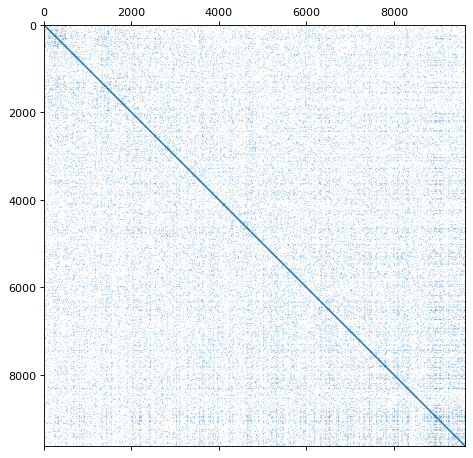

In [108]:
# Vidualize similarity between books
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6), dpi=80)
plt.spy(book_cosine_sim, precision = 0.1, markersize = 0.04)
plt.tight_layout()
plt.show()